<a href="https://colab.research.google.com/github/mk2436/CYBERSECURITY-PREDICTION-MODEL/blob/main/Threats_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the dataset
uploaded = files.upload()
df = pd.read_csv("CyberSecurityThreat.csv")

#  missing values and datatypes
missing_values = df.isnull().sum()
datatypes = df.dtypes


Saving CyberSecurityThreat.csv to CyberSecurityThreat (1).csv


In [ ]:
# Load the dataset
#Print Info

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

df['Year'] = df['Timestamp'].dt.year

yearly_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.pie(yearly_counts, labels=yearly_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(yearly_counts)))
plt.title('Number of Events/Attacks by Year')
plt.show()


<ipython-input-32-d984ce73da0b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attack Type', order=df['Attack Type'].value_counts().index, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: F

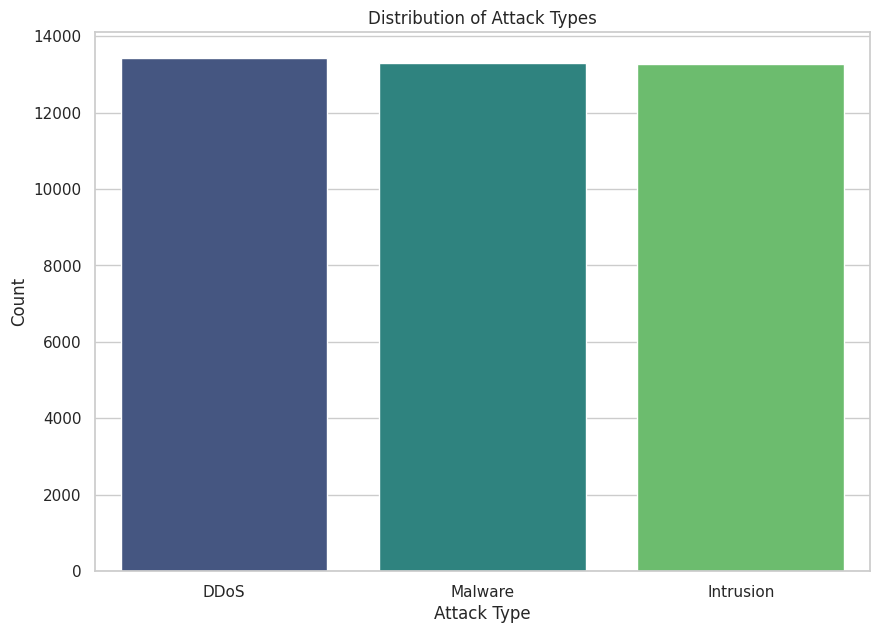

Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64


In [ ]:

sns.set(style="whitegrid")

plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Attack Type', order=df['Attack Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

print(df['Attack Type'].value_counts())


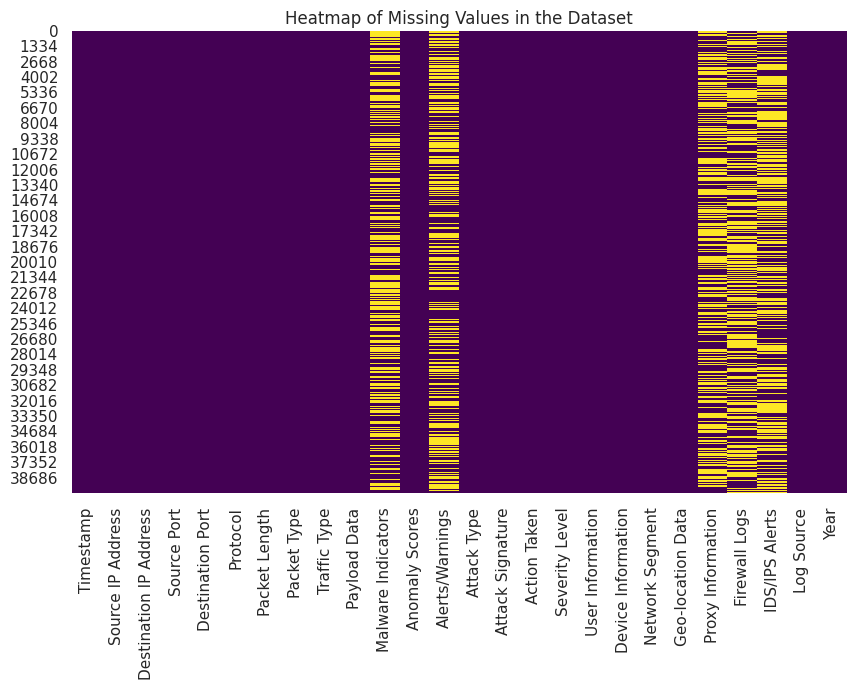

In [ ]:

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in the Dataset')
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


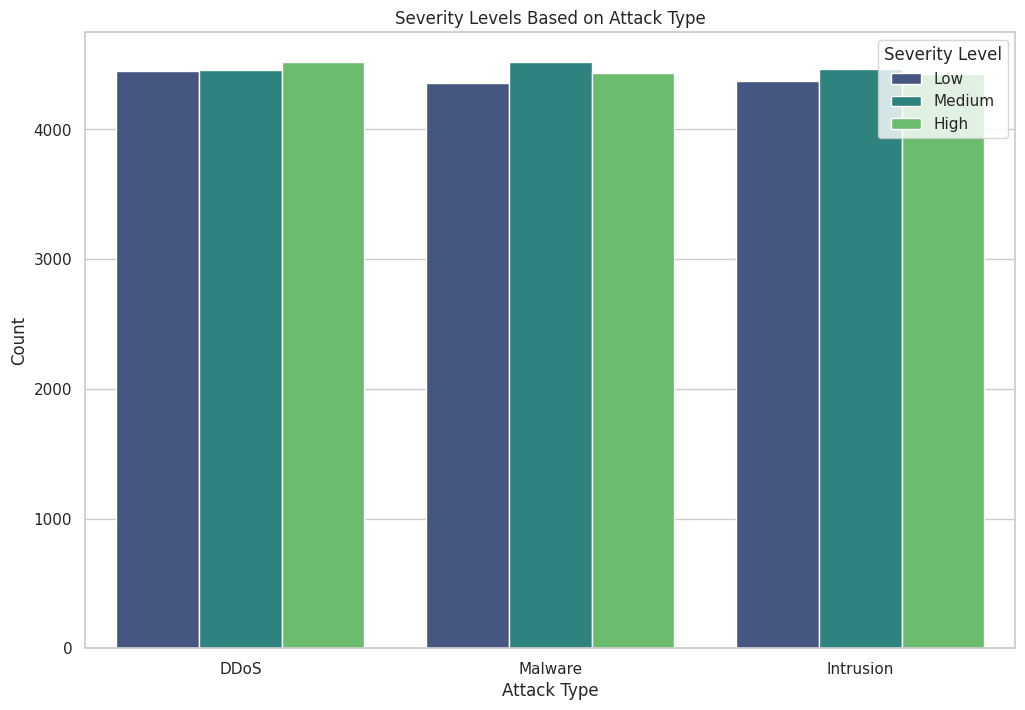

Severity Level
Medium    13435
High      13382
Low       13183
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Attack Type', hue='Severity Level', palette='viridis', order=df['Attack Type'].value_counts().index)
plt.title('Severity Levels Based on Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.legend(title='Severity Level')
plt.show()
print(df['Severity Level'].value_counts())

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


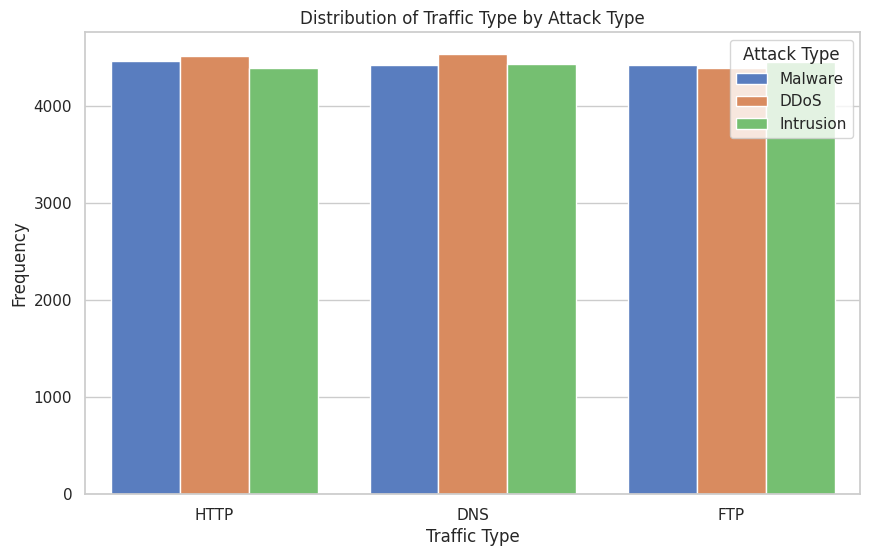

Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64


In [ ]:

plt.figure(figsize=(10,6))

sns.countplot(data=df, x='Traffic Type', hue='Attack Type',  palette='muted')

plt.title('Distribution of Traffic Type by Attack Type')
plt.xlabel('Traffic Type')
plt.ylabel('Frequency')
plt.show()
print(df['Traffic Type'].value_counts())

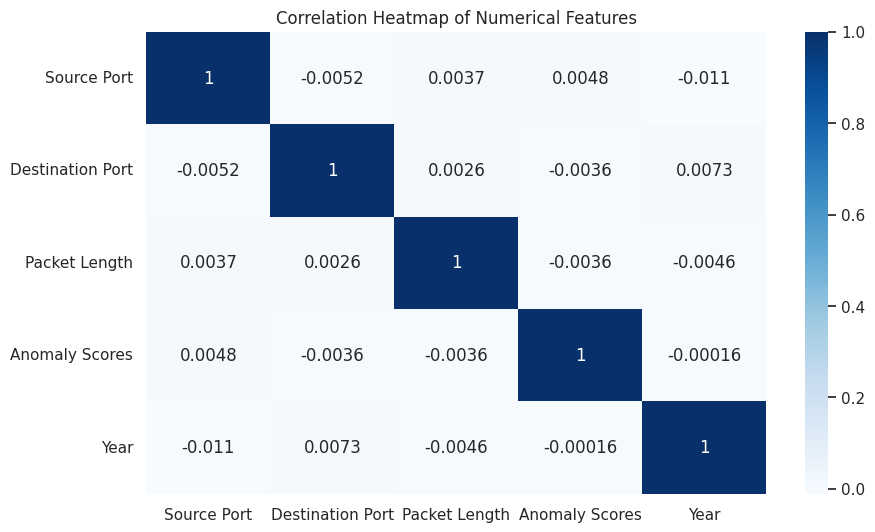

In [ ]:

plt.figure(figsize=(10,6))
numerical_cols = df.select_dtypes(include='number').columns
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

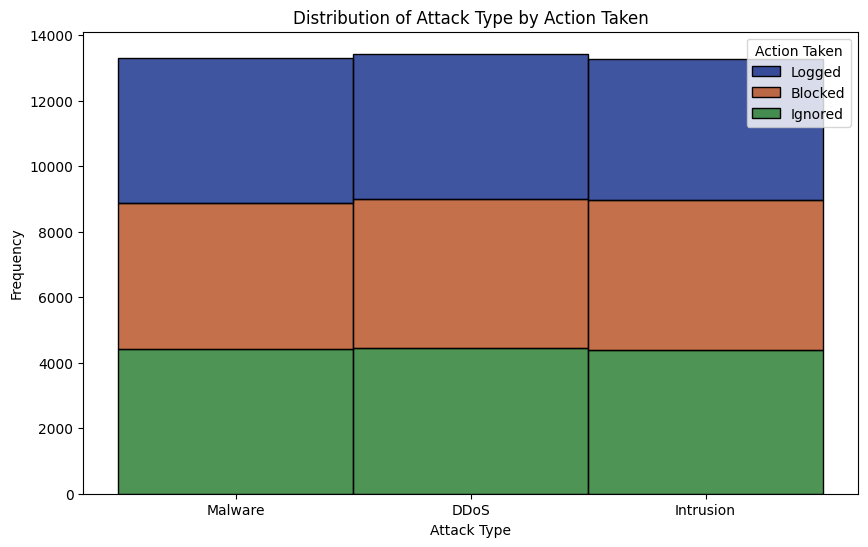

In [ ]:

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Attack Type', hue='Action Taken', multiple='stack', palette='dark', bins=20)
plt.title('Distribution of Attack Type by Action Taken')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.show()


<ipython-input-4-a9b5dd406aaf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attack Type', y='Packet Length',palette='dark')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_grou

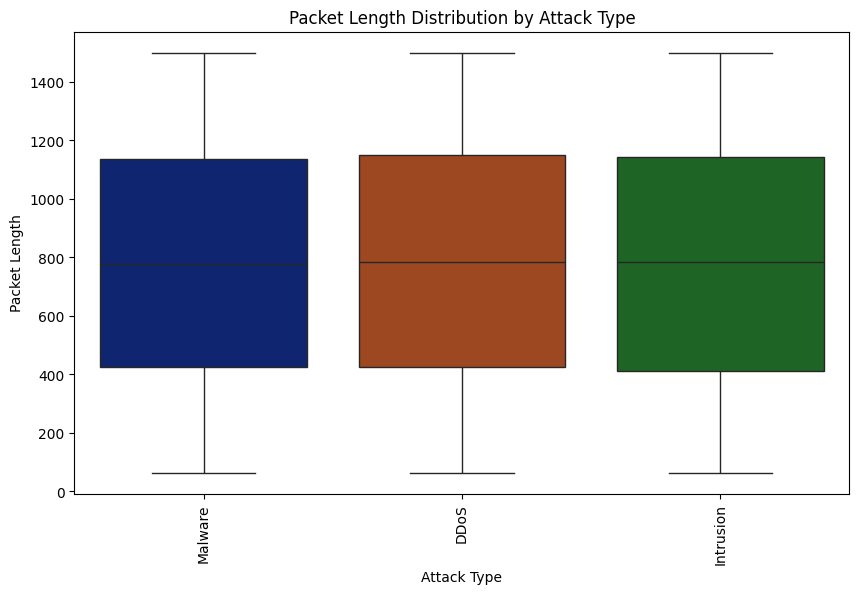

In [ ]:

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Attack Type', y='Packet Length',palette='dark')
plt.title('Packet Length Distribution by Attack Type')
plt.xticks(rotation=90)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

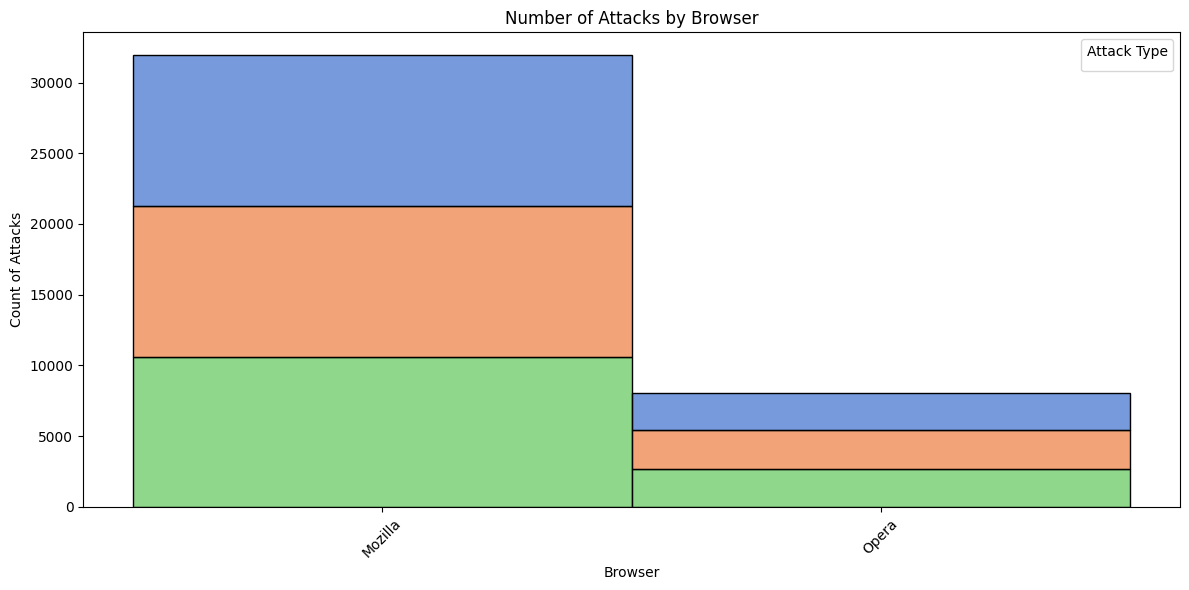

Browser
Mozilla    31951
Opera       8049
Name: count, dtype: int64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

def extract_browser(device_info):
    match = re.search(r'\b(?:Chrome|Firefox|Safari|Opera|MSIE|Trident|Edge|Mozilla|Netscape|Konqueror)\b', device_info)
    return match.group(0) if match else 'Unknown'

df['Browser'] = df['Device Information'].apply(extract_browser)

plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='Browser', hue='Attack Type', multiple='stack', palette='muted', bins=20)

plt.title('Number of Attacks by Browser')
plt.xlabel('Browser')
plt.ylabel('Count of Attacks')
plt.xticks(rotation=45)
plt.legend(title='Attack Type')

plt.tight_layout()
plt.show()
print(df['Browser'].value_counts())